In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

# Exploratory Data Analysis

In [3]:
#reading in the dataset
df = pd.read_csv("data_classification.csv", header=None)
df.shape

(100, 3)

In [4]:
df.head()

,0,1,2
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


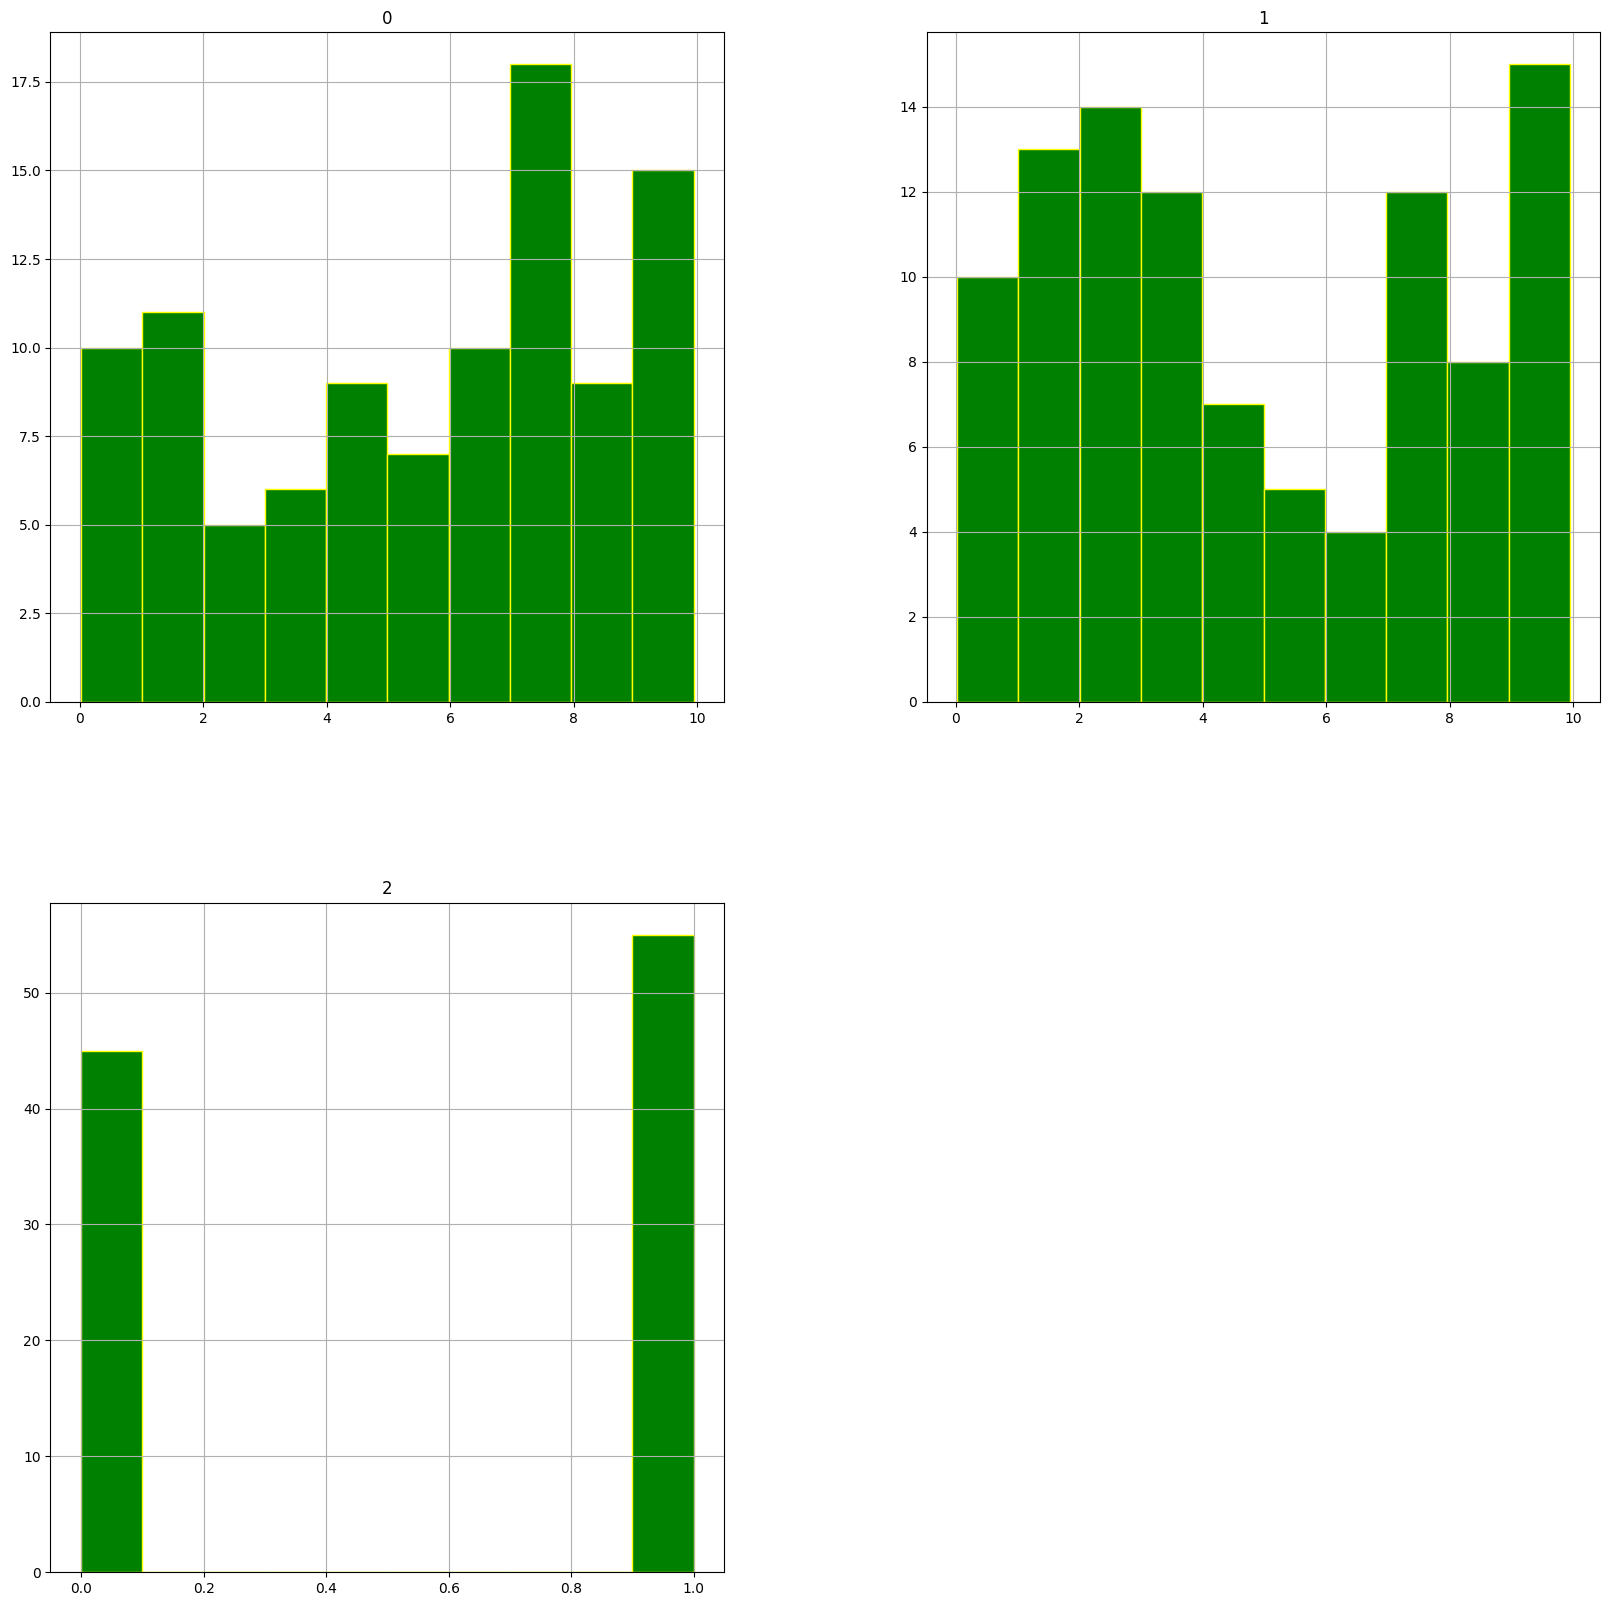

In [5]:

d = df.hist(figsize = (20,20), color='green', edgecolor='yellow')

## Data Cleaning

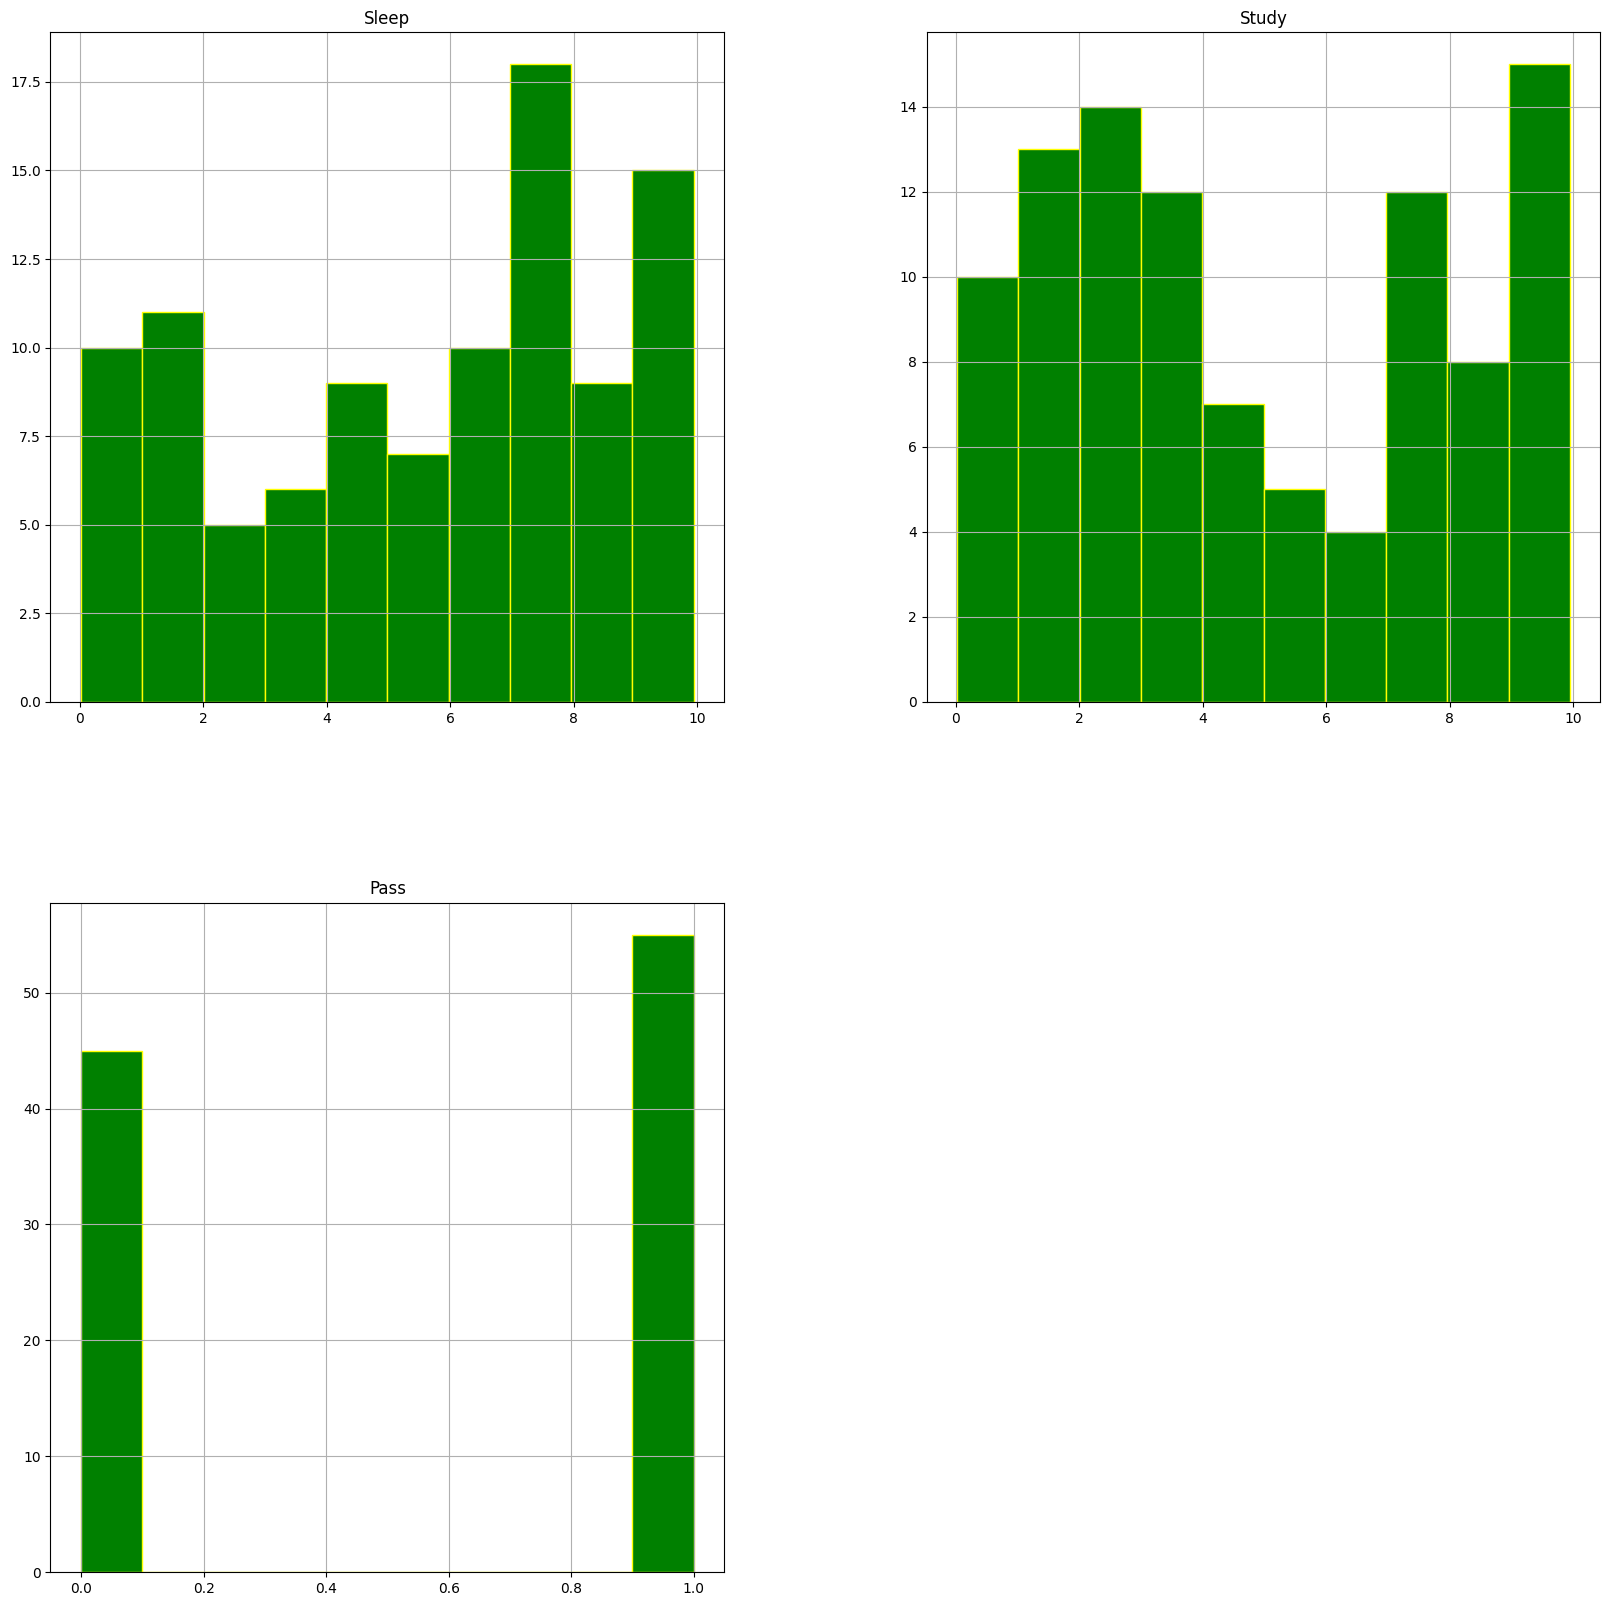

In [6]:
df.columns = ['Sleep', 'Study', 'Pass']

d = df.hist(figsize = (20,20),color='green', edgecolor='yellow')

Pass
1    55
0    45
Name: count, dtype: int64


Text(0.5, 1.0, 'Result')

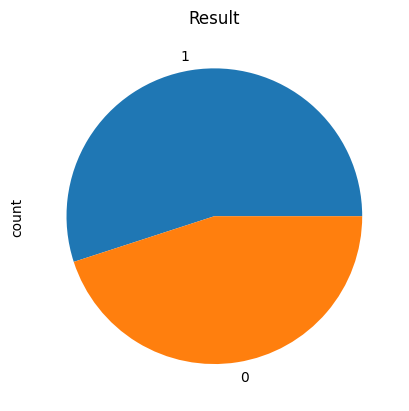

In [7]:
print(df.Pass.value_counts())
df['Pass'].value_counts().plot(kind='pie').set_title('Result')

# Feature Engineering

In [8]:

#split data
a = df.iloc[:, :-1]
b = df.iloc[:, -1]
a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=0,test_size=0.2)

# Building the model

In [53]:
# define the model
model_logistic=LogisticRegression()
model_logistic.fit(a_train,b_train)

LogisticRegression()

In [54]:
model_tree = DecisionTreeClassifier(criterion='entropy')
model_tree.fit(a_train, b_train)

DecisionTreeClassifier(criterion='entropy')

In [98]:
model_rf = RandomForestClassifier(
    n_estimators=15000,
    criterion= 'gini',
    max_depth=200,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features=None,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    max_samples=None
)
model_rf.fit(a_train, b_train)

RandomForestClassifier(max_depth=200, max_features=None, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=15000,
                       oob_score=True)

In [99]:
b_pred_logistic=model_logistic.predict(a_test)
b_pred_tree=model_tree.predict(a_test)
b_pred_rf=model_rf.predict(a_test)

# Evaluation

In [100]:
cm_l=confusion_matrix(b_test,b_pred_logistic)
print(cm_l)

cm_t=confusion_matrix(b_test,b_pred_tree)
print(cm_t)

cm_rf=confusion_matrix(b_test,b_pred_rf)
print(cm_rf)

[[ 6  2]
 [ 0 12]]
[[ 6  2]
 [ 1 11]]
[[ 6  2]
 [ 0 12]]


In [101]:
accuracy_logistic = accuracy_score(b_test, b_pred_logistic)
accuracy_tree = accuracy_score(b_test, b_pred_tree)
accuracy_rf = accuracy_score(b_test, b_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Logistic Regression Accuracy: 90.00%
Decision Tree Accuracy: 85.00%
Random Forest Accuracy: 90.00%


In [83]:
best_accuracy = max(accuracy_logistic, accuracy_tree, accuracy_rf)

if best_accuracy == accuracy_logistic:
    best_model = "Logistic Regression"
    best_model_instance = model_logistic
elif best_accuracy == accuracy_tree:
    best_model = "Decision Tree"
    best_model_instance = model_tree
else:
    best_model = "Random Forest"
    best_model_instance = model_rf

print(f"The model with the highest accuracy is {best_model} with an accuracy of {best_accuracy * 100:.2f}%")

# Lưu model có độ chính xác cao nhất vào file model.pkl
pickle.dump(best_model_instance, open('model.pkl', 'wb'))

The model with the highest accuracy is Logistic Regression with an accuracy of 90.00%


In [31]:
model=pickle.load(open('model.pkl','rb'))